# Experiment with the horse or human classifier


Run the code below to download the dataset horse-or-human.zip.

In [2]:
!pip install gdown
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Created wheel for gdown: filename=gdown-4.0.2-py3-none-any.whl size=10598 sha256=763078b7a3d7fd572fbe50c5082b84d88bb956a3bb3624926fd62de5f734da5a
  Stored in directory: /home/indrap24/.cache/pip/wheels/65/8a/7d/7471d53c4c8ac472998ccd01a56de910be3fc232c8db530c4c
Successfully built gdown
Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /mnt/569013e9-d6c9-40ca-b4a9-2355022e7589/Projects/TensorFlow/TensorFlow-Tutorial/DeepLearning.AI TensorFlow Developer/C4_Using Real World Images.ipynb/horse-or-human.zip
100%|█████████████████████████████████████████| 150M/150M [04:39<00:00, 536kB/s]


In [10]:
!unzip './horse-or-human.zip' -d './horse-or-human' && rm './horse-or-human.zip'

Archive:  ./horse-or-human.zip
  inflating: ./horse-or-human/horses/horse01-0.png  
  inflating: ./horse-or-human/horses/horse01-1.png  
  inflating: ./horse-or-human/horses/horse01-2.png  
  inflating: ./horse-or-human/horses/horse01-3.png  
  inflating: ./horse-or-human/horses/horse01-4.png  
  inflating: ./horse-or-human/horses/horse01-5.png  
  inflating: ./horse-or-human/horses/horse01-6.png  
  inflating: ./horse-or-human/horses/horse01-7.png  
  inflating: ./horse-or-human/horses/horse01-8.png  
  inflating: ./horse-or-human/horses/horse01-9.png  
  inflating: ./horse-or-human/horses/horse02-0.png  
  inflating: ./horse-or-human/horses/horse02-1.png  
  inflating: ./horse-or-human/horses/horse02-2.png  
  inflating: ./horse-or-human/horses/horse02-3.png  
  inflating: ./horse-or-human/horses/horse02-4.png  
  inflating: ./horse-or-human/horses/horse02-5.png  
  inflating: ./horse-or-human/horses/horse02-6.png  
  inflating: ./horse-or-human/horses/horse02-7.png  
  inflating: ./

The contents of the .zip are extracted to the base directory `./horse-or-human`, which in turn each contain horses and humans subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc. Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step.

Let's define each of these directories:

In [1]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

Now, let's see what the filenames look like in the horses and humans training directories:

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse39-7.png', 'horse47-4.png', 'horse32-9.png', 'horse50-4.png', 'horse36-4.png', 'horse11-9.png', 'horse12-2.png', 'horse08-4.png', 'horse27-1.png', 'horse28-2.png']
['human03-25.png', 'human09-15.png', 'human14-04.png', 'human06-11.png', 'human07-25.png', 'human10-17.png', 'human16-17.png', 'human01-20.png', 'human12-30.png', 'human06-09.png']


Let's find out the total number of horse and human images in the directories:

In [3]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

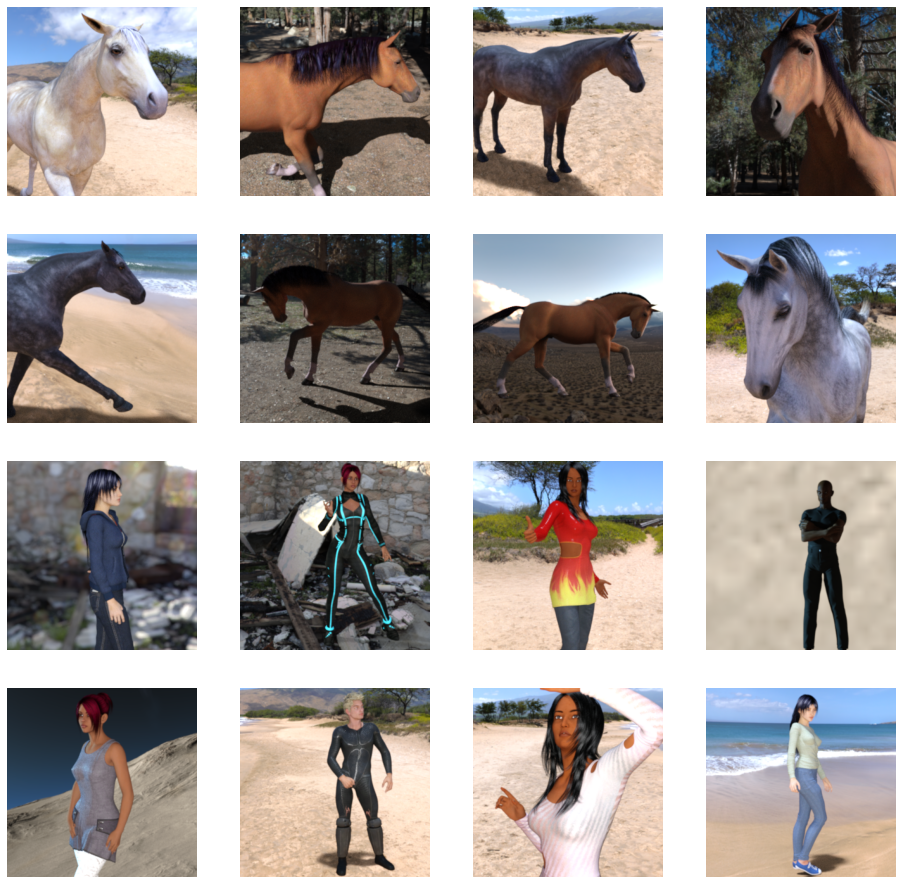

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Building a Small Model from Scratch¶
But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [6]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers.

Note that because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the Machine Learning Crash Course.) We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

# Data Preprocessing
Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the **`keras.preprocessing.image.ImageDataGenerator`** class using the rescale parameter. This **`ImageDataGenerator`** class allows you to instantiate generators of augmented image batches (and their labels) via **`.flow(data, labels)`** or **`.flow_from_directory(directory)`**. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator